# Clustering: KMeans Algorithm

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Reading and preparing the dataset

In [2]:
data = pandas.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
encoding_map = {'Gender': {'Male': 0, 'Female': 1}}
data.replace(encoding_map, inplace=True)

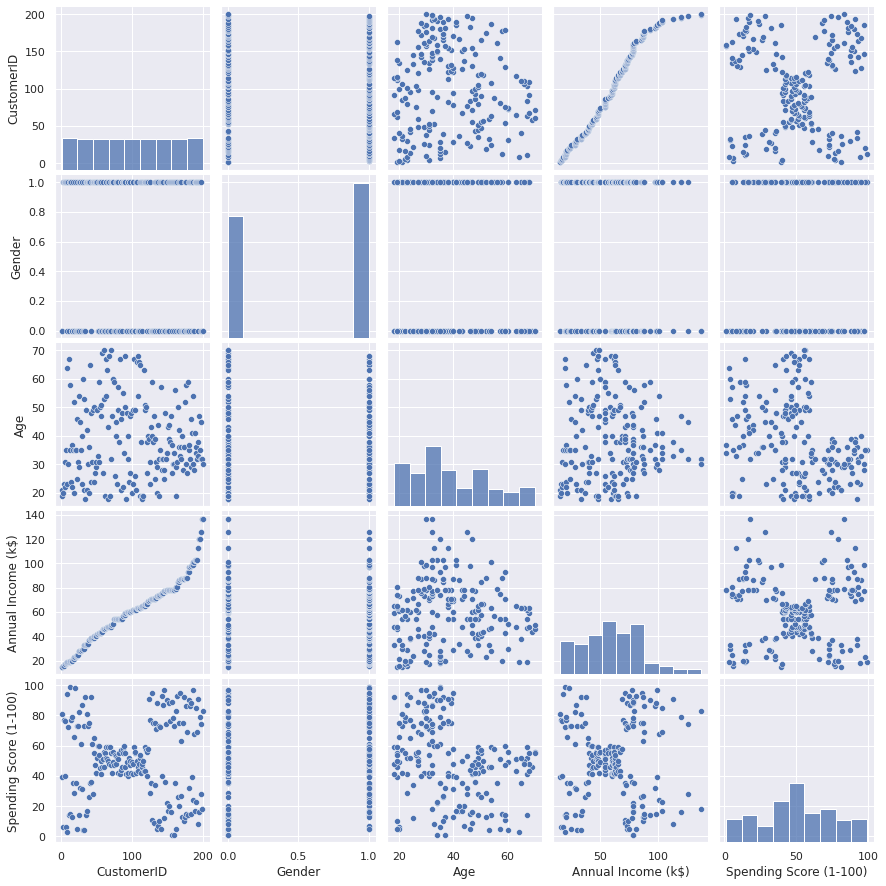

In [5]:
sns.pairplot(data)

## Select the features

In [6]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

X = data[features].values
# y = data[label].values

In [7]:
print(X[:5])

[[ 0 19 15 39]
 [ 0 21 15 81]
 [ 1 20 16  6]
 [ 1 23 16 77]
 [ 1 31 17 40]]


## Creating model

In [8]:
from sklearn.cluster import KMeans

model = KMeans()
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
print(f"# of samples in train set: {model.labels_.shape} \n")
print(model.labels_)

# of samples in train set: (200,) 

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 0 4 0 4 5 4 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 6 3 6 3 6 7 6 7 6 3 6 7 6 7 6 7 6 7 6 3 6 7 6 1 6
 7 6 7 6 7 6 7 6 7 6 7 6 1 6 7 6 1 6 7 6 1 6 7 6 7 6 1 6 1 6 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [10]:
print(model.cluster_centers_.shape)
print()
print(features)
print(model.cluster_centers_)

(8, 4)

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
[[  0.55555556  56.15555556  53.37777778  49.08888889]
 [  0.58823529  45.23529412  99.64705882  22.70588235]
 [  0.54545455  32.45454545 108.18181818  82.72727273]
 [  0.63157895  27.31578947  57.5         48.44736842]
 [  0.60869565  25.52173913  26.30434783  78.56521739]
 [  0.61904762  44.14285714  25.14285714  19.52380952]
 [  0.53571429  32.78571429  78.03571429  81.89285714]
 [  0.29411765  38.05882353  77.82352941  10.82352941]]


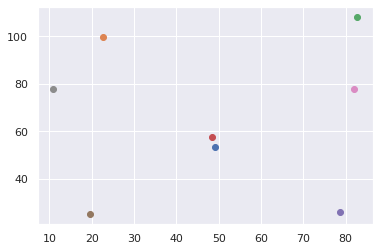

In [11]:
for center in model.cluster_centers_:
  plt.scatter(x = center[3], # spending score
              y = center[2]) # annual income

## _Remember the graph_

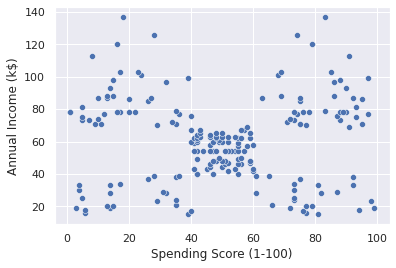

In [12]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=data)

In [13]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

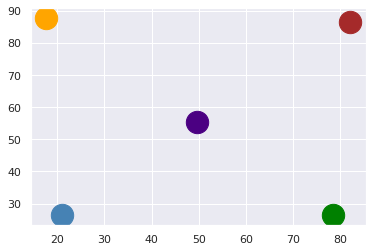

In [14]:
colors = {0: 'steelblue', 1: 'green', 2: 'indigo', 3: 'orange', 4: 'brown',
          5: 'gold'}

for index, center in enumerate(model.cluster_centers_):
  plt.scatter(center[3], center[2], s=500, color=colors[index])

In [15]:
predictions = model.predict(X)
print(f'Shape of predictions: {predictions.shape}')
print(predictions[:5])

Shape of predictions: (200,)
[0 1 0 1 0]


In [16]:
samples = {}

for i, label in enumerate(predictions):
  if label not in samples:
    samples[label] = [X[i]]
  else:
    samples[label].append(X[i])

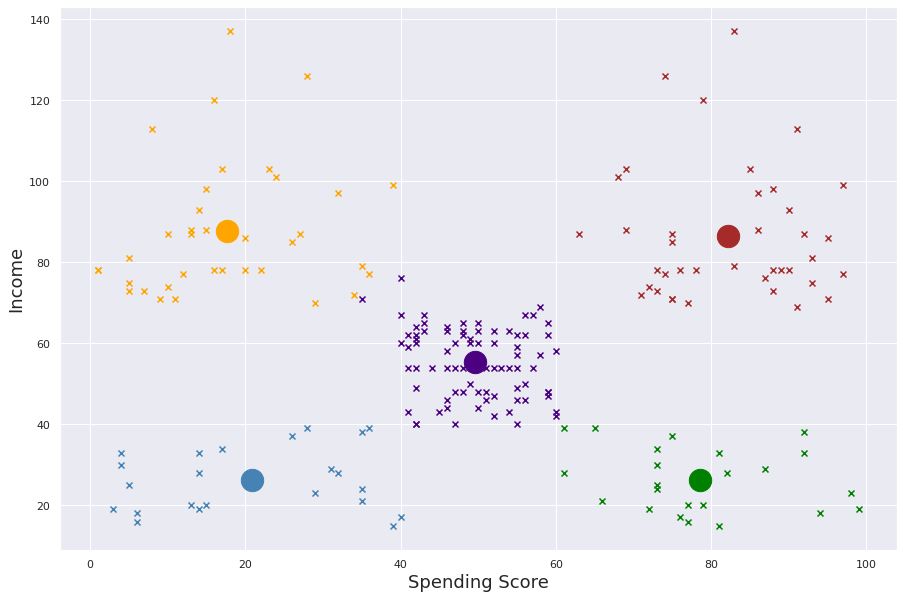

In [17]:
plt.figure(figsize=(15,10))
for label in samples:
  temp = np.array(samples[label])
  plt.scatter(temp[:, 3], temp[:, 2], marker='x', color=colors[label])
  plt.scatter(model.cluster_centers_[label, 3],
              model.cluster_centers_[label, 2], s=500, color=colors[label])
  plt.xlabel("Spending Score", fontsize=18)
  plt.ylabel("Income", fontsize=18)

## Predictions

In [18]:
test_samples = np.array([[1, 20, 10, 40],
                         [0, 25, 80, 30],
                         [1, 30, 75, 42]])

predictions = model.predict(test_samples)

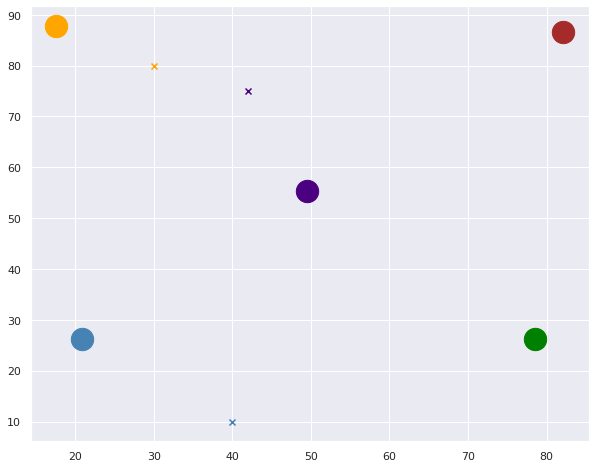

In [19]:
plt.figure(figsize=(10,8))
for index, pred in enumerate(predictions):
  plt.scatter(test_samples[index, 3], test_samples[index, 2], marker='x', color=colors[pred])

for label in range(0, 5):
  plt.scatter(model.cluster_centers_[label, 3],
              model.cluster_centers_[label, 2], s=500, color=colors[label])

## However, we have more than two feature. Thus, how we can select cluster _n_?

### _Elbow method_

In [20]:
inertia = []

for n in range(2, 20):
  model = KMeans(n_clusters=n)
  model.fit(X)
  inertia.append(model.inertia_)

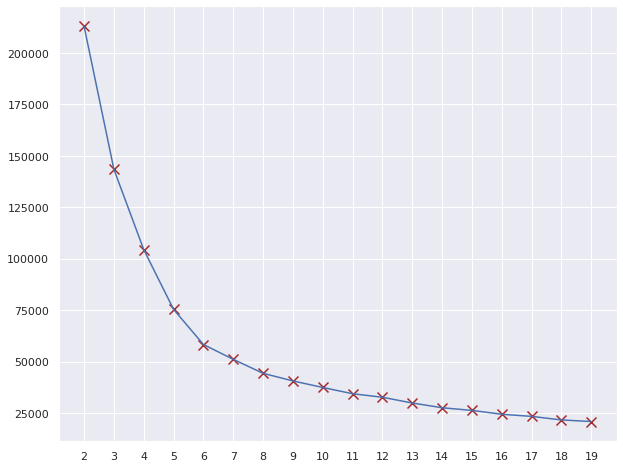

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(np.arange(2, 20), inertia, marker='x', s=100, color='brown')
plt.plot(np.arange(2, 20), inertia)
plt.xticks(np.arange(2, 20))
plt.show()

## So, we selected the _n_ clusters wrt elbow method

In [23]:
model = KMeans(n_clusters=6)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Assesment of the model

Silhouette score:

$s = \frac{b-a}{max(a,b)}$

where 
* a: The mean distance between a sample and all other points in the same class.

* b: The mean distance between a sample and all other points in the next nearest cluster.

_Src: https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient_

In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(X, model.labels_)

0.45205475380756527

# Visualization of results

In [25]:
predictions = model.predict(X)

samples = {}
for index, label in enumerate(predictions):
  if label not in samples: 
    samples[label] = [list(X[index])]
  else:
    samples[label].append(list(X[index]))

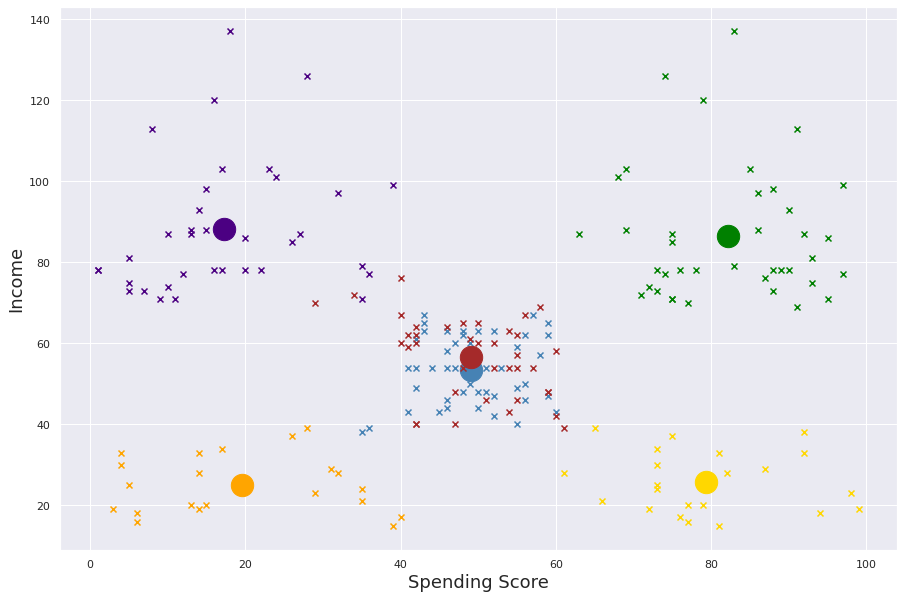

In [26]:
plt.figure(figsize=(15,10))
for label in samples:
  temp = np.array(samples[label])
  plt.scatter(temp[:, 3], temp[:, 2], marker='x', color=colors[label])
  plt.scatter(model.cluster_centers_[label, 3],
              model.cluster_centers_[label, 2], s=500, color=colors[label])
  plt.xlabel("Spending Score", fontsize=18)
  plt.ylabel("Income", fontsize=18)

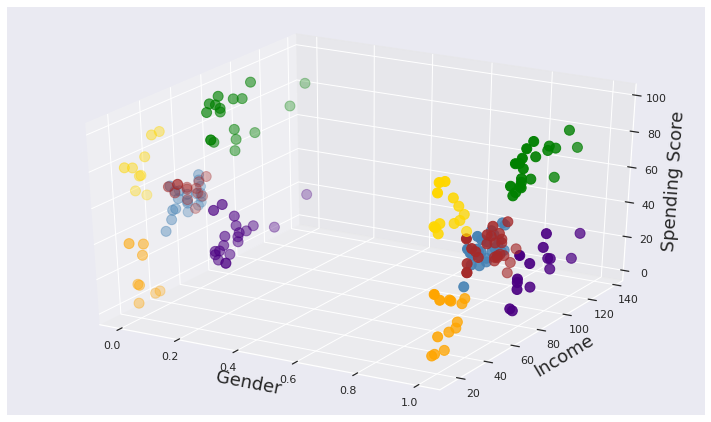

In [27]:
from mpl_toolkits.mplot3d import Axes3D # for 3D projection

fig = plt.figure(figsize=(12.5,7.5))
ax = fig.add_subplot(111, projection='3d')
for label in samples:
  temp = np.array(samples[label])
  x = temp[:, 0] # Gender
  y = temp[:, 2] # Income
  z = temp[:, 3] # Spending score
  ax.scatter(x, y, z, s=100, color=colors[label])
  ax.set_xlabel("Gender", fontsize=18)
  ax.set_ylabel("Income", fontsize=18)
  ax.set_zlabel("Spending Score", fontsize=18)

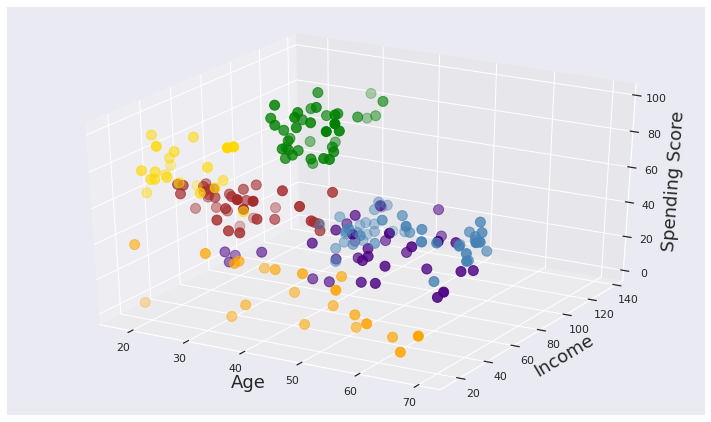

In [28]:
fig = plt.figure(figsize=(12.5,7.5))
ax = fig.add_subplot(111, projection='3d')
for label in samples:
  temp = np.array(samples[label])
  x = temp[:, 1] # Age
  y = temp[:, 2] # Income
  z = temp[:, 3] # Spending score
  ax.scatter(x, y, z, s=100, color=colors[label])
  ax.set_xlabel("Age", fontsize=18)
  ax.set_ylabel("Income", fontsize=18)
  ax.set_zlabel("Spending Score", fontsize=18)

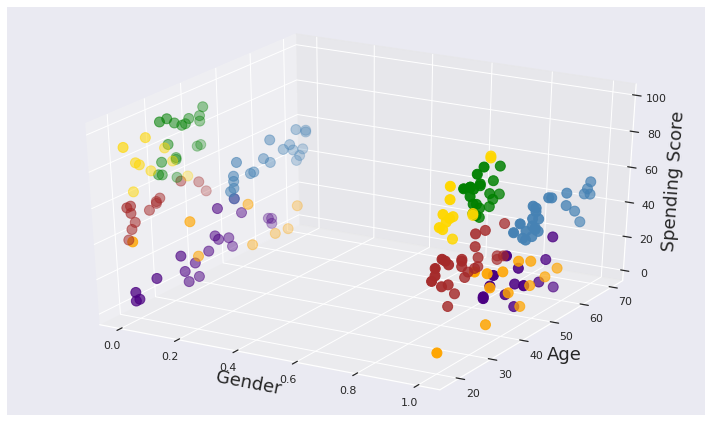

In [29]:
fig = plt.figure(figsize=(12.5,7.5))
ax = fig.add_subplot(111, projection='3d')
for label in samples:
  temp = np.array(samples[label])
  x = temp[:, 0] # Gender
  y = temp[:, 1] # Age
  z = temp[:, 3] # Spending score
  ax.scatter(x, y, z, s=100, color=colors[label])
  ax.set_xlabel("Gender", fontsize=18)
  ax.set_ylabel("Age", fontsize=18)
  ax.set_zlabel("Spending Score", fontsize=18)

## Should we normalize the dataset for clustering?

### _Depends on technique_

In [30]:
from sklearn.preprocessing import normalize

X_l2 = normalize(X, norm='l2')
X_l1 = normalize(X, norm='l1')
X_max = normalize(X, norm='max')
print(f'w/out normalization: {X[:5]}\n')
print(f'L2: {X_l2[:5]}\n')
print(f'L1: {X_l1[:5]}\n')
print(f'Max: {X_max[:5]}\n')


w/out normalization: [[ 0 19 15 39]
 [ 0 21 15 81]
 [ 1 20 16  6]
 [ 1 23 16 77]
 [ 1 31 17 40]]

L2: [[0.         0.41392469 0.32678265 0.84963489]
 [0.         0.24702464 0.17644617 0.95280931]
 [0.03798686 0.75973718 0.60778974 0.22792115]
 [0.01220329 0.28067571 0.19525267 0.93965346]
 [0.01872843 0.58058136 0.31838332 0.74913723]]

L1: [[0.         0.26027397 0.20547945 0.53424658]
 [0.         0.17948718 0.12820513 0.69230769]
 [0.02325581 0.46511628 0.37209302 0.13953488]
 [0.00854701 0.1965812  0.13675214 0.65811966]
 [0.01123596 0.34831461 0.19101124 0.4494382 ]]

Max: [[0.         0.48717949 0.38461538 1.        ]
 [0.         0.25925926 0.18518519 1.        ]
 [0.05       1.         0.8        0.3       ]
 [0.01298701 0.2987013  0.20779221 1.        ]
 [0.025      0.775      0.425      1.        ]]



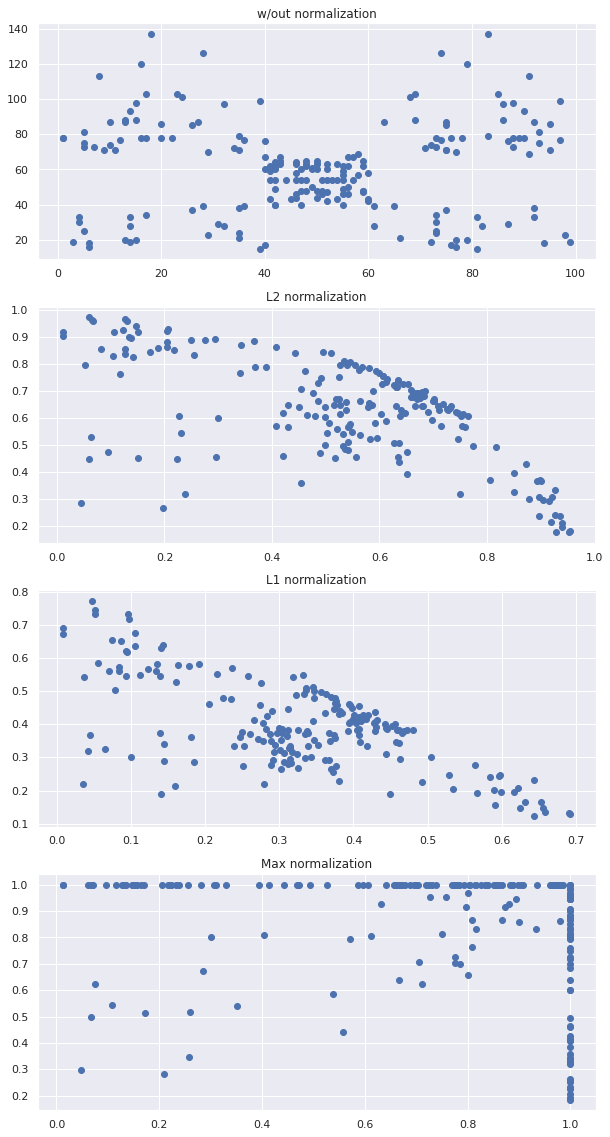

In [31]:
plt.figure(figsize=(10,20))
plt.subplot(411)
plt.title('w/out normalization')
plt.scatter(X[:, 3], X[:, 2])
plt.subplot(412)
plt.title('L2 normalization')
plt.scatter(X_l2[:, 3], X_l2[:, 2])
plt.subplot(413)
plt.title('L1 normalization')
plt.scatter(X_l1[:, 3], X_l1[:, 2])
plt.subplot(414)
plt.title('Max normalization')
plt.scatter(X_max[:, 3], X_max[:, 2])

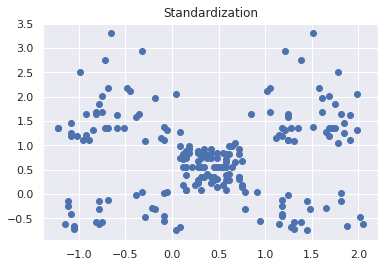

In [32]:
# Standardization
X_std = (X - X.mean()) / X.std()

plt.title('Standardization')
plt.scatter(X_std[:, 3], X_std[:, 2])

## Don't be confused with kNN

kNN: <img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png" width=300> kMeans:
<img src="https://camo.githubusercontent.com/8f78865dda4e30d6ba4b5687375de4724f2edd503dfbe51406ef704dbd0c78a2/68747470733a2f2f692e696d6775722e636f6d2f533635536b39632e6a7067" width=500>

_Images are taken from: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn, https://github.com/bheemnitd/2D-KMeans-Clustering_

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

dataset = load_iris()
X = dataset.data
y = dataset.target

model = KNeighborsClassifier()
model.fit(X, y)
score = model.score(X, y)
print(f'Score => {score}')

Score => 0.9666666666666667
